In [1]:
import pandas as pd
import json

data_id  = pd.read_csv('./data/data_identification.csv')
emo = pd.read_csv('./data/emotion.csv')

In [2]:
tweets_str = open('./data/tweets_DM.json').read()
tweets_str = "[" + tweets_str.replace("}\n{", "}\n,{") + "]"
# print(tweets_str[:1000])
tweets = json.loads(tweets_str)

tweet_df = pd.DataFrame(tweets)
source = pd.DataFrame(list(tweet_df._source.apply(lambda x: x['tweet']).values))
tweet_df = pd.concat([tweet_df, source], axis=1).drop(['_source','_type','_index'], axis=1)

In [3]:
data_id

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [4]:
emo

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [5]:
tweet_df

,_score,_crawldate,hashtags,tweet_id,text
0,391,2015-05-23 11:42:47,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,2016-01-28 04:52:09,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,2017-12-25 04:39:20,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,2016-01-24 23:53:05,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,2016-01-08 17:18:59,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...
1867530,827,2015-05-12 12:51:52,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,2017-10-02 17:54:04,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,498,2016-10-10 11:04:32,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,840,2016-09-02 14:25:06,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


/home/manu/PycharmProjects/data_mining/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='_score', ylabel='Density'>

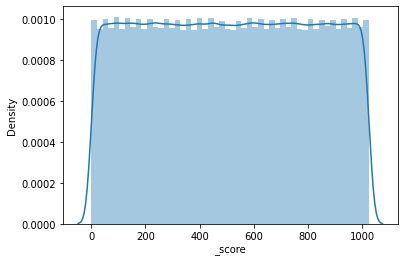

In [6]:
import seaborn as sns

sns.distplot(tweet_df._score)

In [7]:
tweet_df = tweet_df.merge(data_id, left_on='tweet_id', right_on='tweet_id')

In [8]:
train_df = tweet_df[tweet_df.identification == 'train'].merge(emo)
test_df = tweet_df[tweet_df.identification == 'test']

In [9]:
train_df.shape

(1455563, 7)

In [10]:
test_df.shape

(411972, 6)